In [46]:
# https://docs.google.com/spreadsheets/d/1RyZFsOIgHkxjjyVA-FQxI_vbFJG54zfeHgaUf0KMNWQ/edit#gid=276016086

In [87]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

In [88]:
# Import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import * 

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.neighbors import KNeighborsClassifier

In [103]:
df = pd.read_csv('data_set.csv')
df = df.drop('age', axis = 1)

In [104]:
x = df.drop('target',axis = 1)
y = df['target']
feature_names = df.columns.tolist()
Train_X, Test_X, Train_Y, Test_Y = train_test_split(x, y, test_size = 0.2)

In [105]:
import imblearn.over_sampling as osam 

ros = osam.RandomOverSampler(random_state = 13)
oversampled_X, oversampled_Y = ros.fit_sample(Train_X, Train_Y)

In [106]:
G_NB = GaussianNB().fit(oversampled_X, oversampled_Y)
predicted = G_NB.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

0.6293386919985385
0.5845070422535211


In [107]:
SVM = svm.SVC(kernel = 'rbf',C = 7,gamma = 0.1).fit(oversampled_X, oversampled_Y)
predicted = SVM.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

0.5
0.8380281690140845


In [108]:
KNN = KNeighborsClassifier(n_neighbors=3).fit(oversampled_X, oversampled_Y)
predicted = KNN.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

0.5127877237851662
0.6830985915492958


In [109]:
LG = LogisticRegression(random_state = 13).fit(oversampled_X, oversampled_Y)
predicted = LG.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

0.5886006576543661
0.6338028169014085


0.6867007672634271
0.7394366197183099


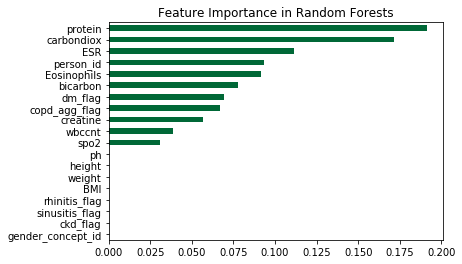

In [110]:
DC = DecisionTreeClassifier(max_depth = 5, random_state = 13).fit(oversampled_X, oversampled_Y)
predicted = DC.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

pd.Series(DC.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.5,cmap='RdYlGn_r')
plt.title('Feature Importance in Random Forests')
plt.show()

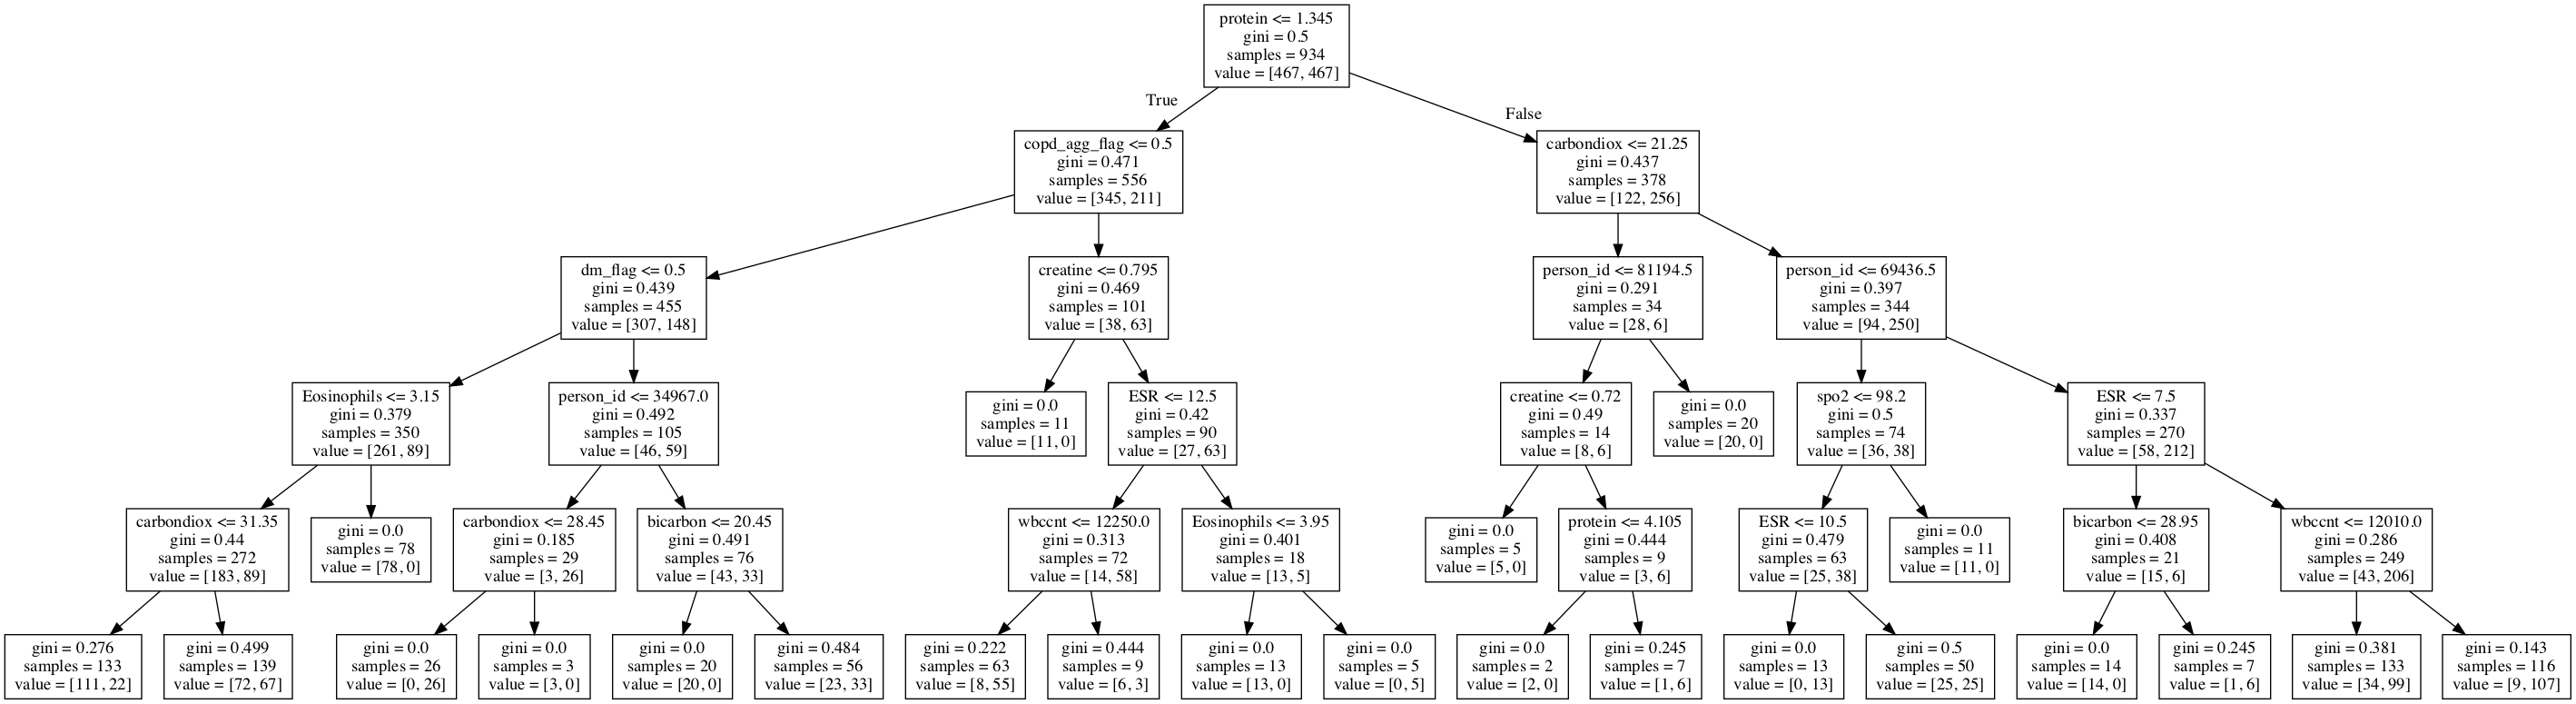

In [111]:
from sklearn.tree import export_graphviz

X = np.array(x)
y = np.array(y)
feature_names = x.columns.tolist()
draw_decision_tree(DC)

0.6916331750091341
0.7183098591549296


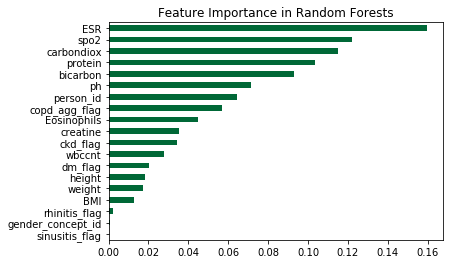

In [112]:
RF = RandomForestClassifier(n_estimators=100, max_depth=3,
                               random_state=13).fit(oversampled_X, oversampled_Y)
predicted = RF.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))
print (accuracy_score(Test_Y, predicted))

pd.Series(RF.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.5,cmap='RdYlGn_r')
plt.title('Feature Importance in Random Forests')
plt.show()

In [113]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
kfold = KFold(n_splits = 8, random_state = 13) 
xyz = []
accuracy = []
std = []
classifiers = ['SVM','G_NB','Logistic Regression','KNN',
               'Decision Tree','Random Forest']
models = [SVM,G_NB,LG,KNN,DC,RF]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y,cv = kfold,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)

                      CV Mean       Std
SVM                  0.827662  0.032853
G_NB                 0.737360  0.032204
Logistic Regression  0.807983  0.037395
KNN                  0.751436  0.097960
Decision Tree        0.781090  0.040158
Random Forest        0.826242  0.034423
------------------------


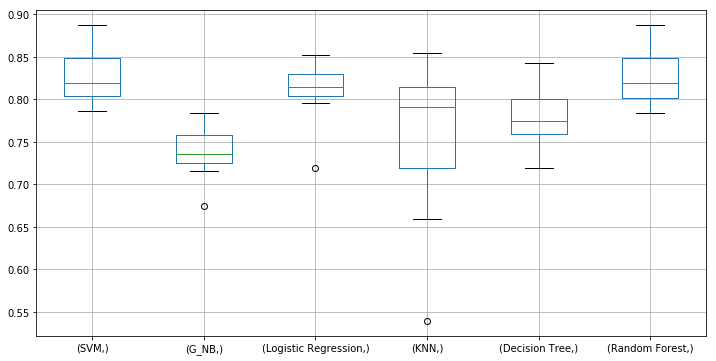

In [114]:
print (new_models_dataframe)
print ('------------------------')
plt.subplots(figsize = (12,6))
box = pd.DataFrame(accuracy,index = [classifiers])
box.T.boxplot()
plt.show()

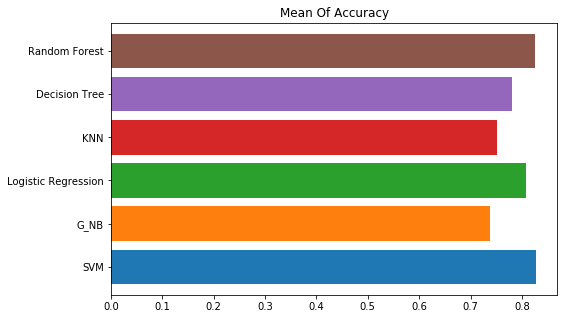

In [115]:
new_models_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Mean Of Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

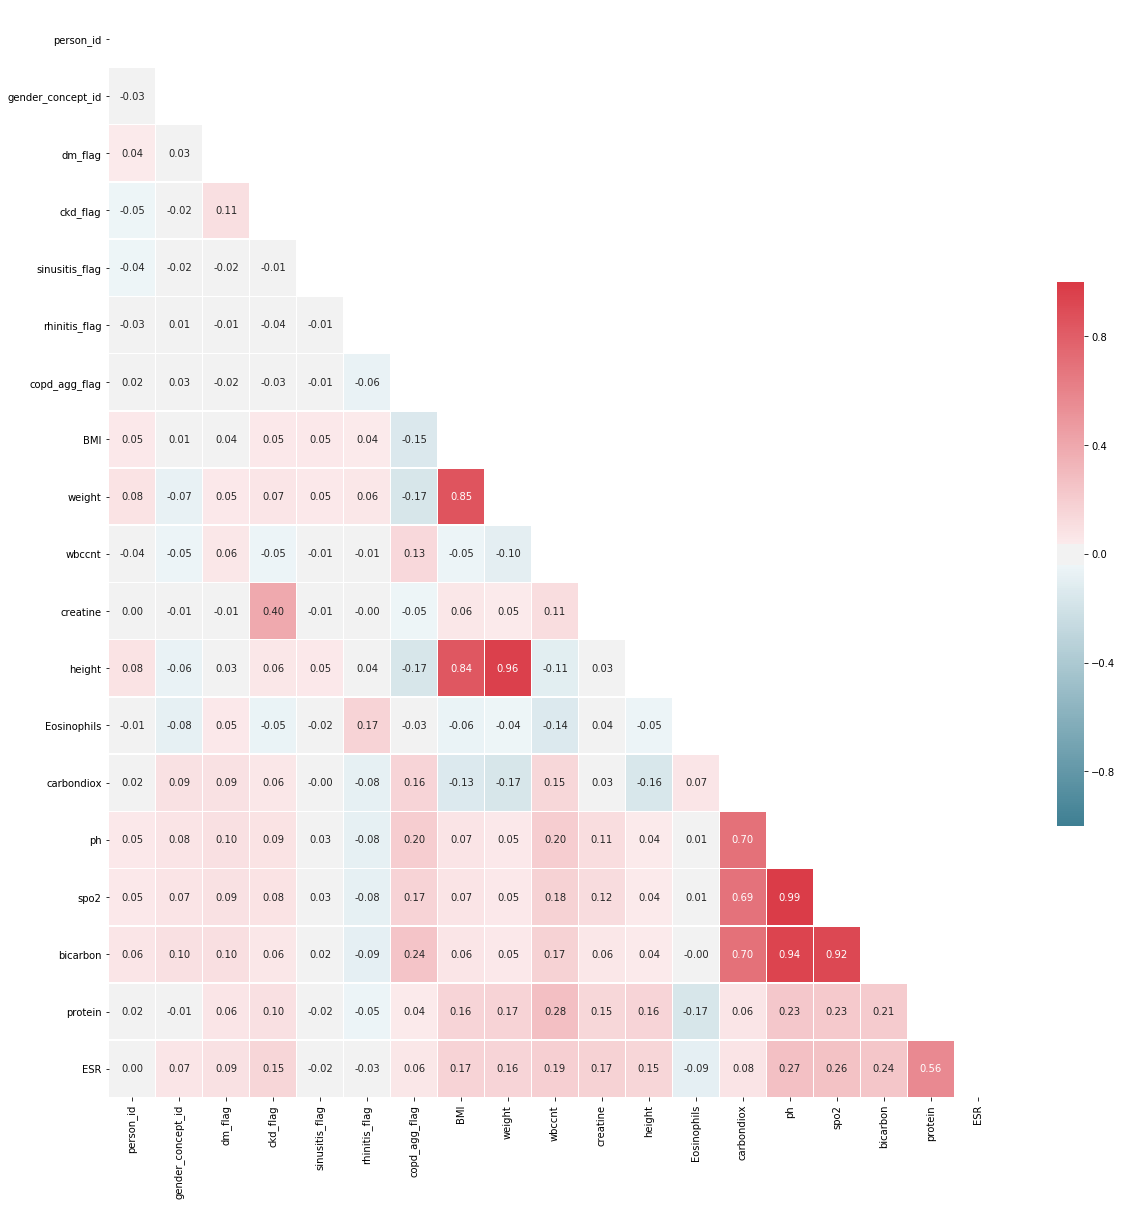

In [116]:
cor = x
x = cor.corr()
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize = (20, 20))
heatmap = sns.heatmap(x, mask=mask,  cmap=cmap, cbar_kws={"shrink": 0.5}, 
            annot=True, annot_kws={"size": 10}, 
            vmax=1, vmin=-1, center=0,  linewidths=.5, fmt='.2f')
plt.savefig('corr.png',)
plt.show()

In [53]:
# from fancyimpute import KNN 